<center><img src='./Figs/cs-logo.png' width=200></center>



<h6><center></center></h6>

<h1>
<hr style=" border:none; height:3px;">
<center>LAB 3: Harris Detector and Panorama Creation </center>
<hr style=" border:none; height:3px;">
</h1>

The objective of this lab is to develop your own interest point detector using Harris' method (refer to the course).

## Exercise 1: Calculating the Harris Criterion
Here, you are required to write a function or set of functions that return the Harris corner map $ H = det C - \alpha (trace C)^{2}$ for a given image and a given scale (window size). Use $\alpha = 0.04$.


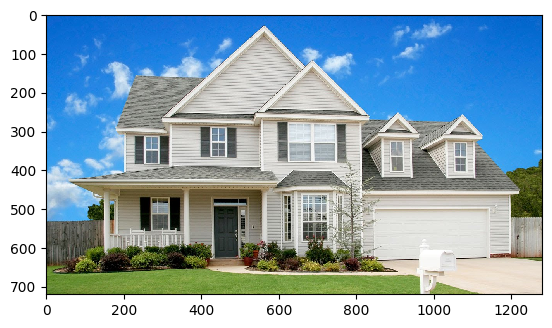

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2


def loadImagebis(src):
    img=cv2.imread(src,1)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb,interpolation='nearest')
    plt.show()
    return img

img = loadImagebis('./Data/house.jpg')

### Step 1
Calculate $I_{x}$ and $I_{y}$ gradient in $x$ and $y$ of a smoothed image using the Sobel operator.

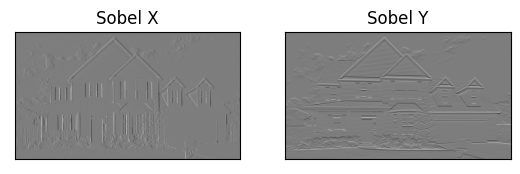

In [2]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=5)
plt.subplot(1,2,1),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

### Step 2
Calculate $I_{x}^{2}$, $I_{x}^{2}$ and $I_{xy}= I_{x} \times I_{y}$.

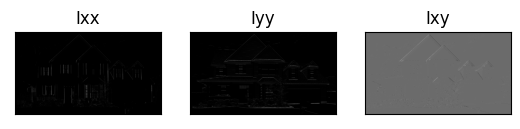

In [3]:
Ixx =np.multiply(sobelx,sobelx)
Iyy =np.multiply(sobely, sobely) 
Ixy=np.multiply(sobelx, sobely) 
plt.subplot(1,3,1),plt.imshow(Ixx,cmap = 'gray')
plt.title('Ixx'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(Iyy,cmap = 'gray')
plt.title('Iyy'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(Ixy,cmap = 'gray')
plt.title('Ixy'), plt.xticks([]), plt.yticks([])
plt.show()

### Step 3
Smooth each of the previous images with a Gaussian filter of size $N$.

In [4]:
Ixx_filtered = cv2.GaussianBlur(Ixx,(5,5),2)
Iyy_filtered = cv2.GaussianBlur(Iyy,(5,5),2)
Ixy_filtered = cv2.GaussianBlur(Ixy,(5,5),2)

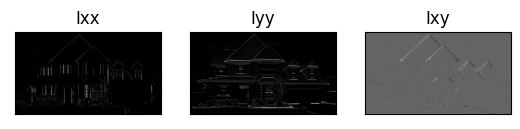

In [5]:
plt.subplot(1,3,1),plt.imshow(Ixx_filtered,cmap = 'gray')
plt.title('Ixx'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(Iyy_filtered,cmap = 'gray')
plt.title('Iyy'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(Ixy_filtered,cmap = 'gray')
plt.title('Ixy'), plt.xticks([]), plt.yticks([])
plt.show()

### Step 4
At each pixel, calculate the Harris function:$ H = det C - \alpha (trace C)^{2}$ with $\alpha = 0.04

In [6]:
k = 0.04

# determinant
detA = Ixx_filtered * Iyy_filtered - Ixy_filtered ** 2
# trace
traceA = Ixx_filtered + Iyy_filtered
    
harris_response =detA - k * traceA ** 2

Apply to the house image and display the $H$ image.

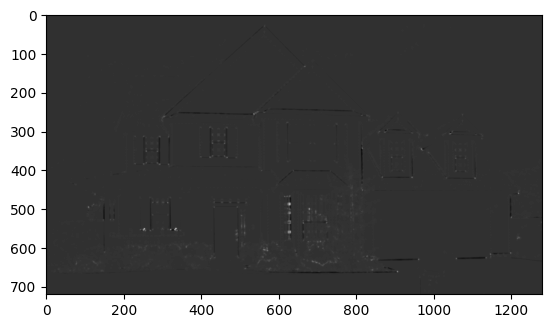

In [7]:
plt.imshow(harris_response,cmap = 'gray')
plt.show()

## Exercise 2: Corner detection

The aim here is to set up functions to detect corners from the corner map constructed in the previous section.

Write a function to binarize the corner map using a thresholding operation.

(-0.5, 1279.5, 719.5, -0.5)

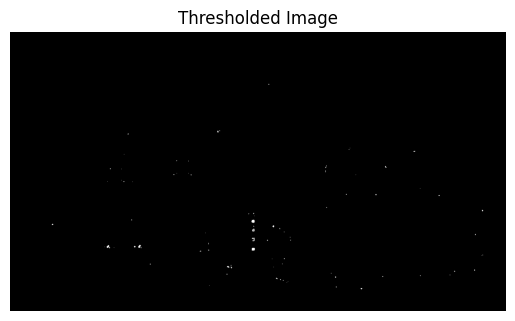

In [8]:
# Threshold the image
ratio = .2 # Number to tweak
thresh = abs(harris_response) > ratio * abs(harris_response).max()
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')

Write a function to extract local maxima on a $3-$times-3 neighborhood (set to 0 in the binarized image all points whose value is not greater than that of the 8 neighbors). 

In [9]:

# Compute non-maximal supression

# Get the indexes of the non zero values
non_zero_cords = np.nonzero(thresh)

# Tupled Co-ordinates
tuple_cords = [(i, j) for i,j in zip(non_zero_cords[0], non_zero_cords[1])] 
# Values at the these co-ordinates
values = [abs(harris_response)[i, j] for i, j in tuple_cords]
# Sort the co-ordinates based on the R values
sorted_cords = [tuple_cords[i] for i in np.argsort(values)[::-1]]
# Set Distance to perform non-maximal supression
# Any point with this distance of an 
# already selected point will be suppressed
distance = 10 # Number to tweak 
# List to hold the cords after NMS
nms_cords = []
nms_cords.append(sorted_cords[0])
for cord in sorted_cords:
    for nms_cord in nms_cords:
        if abs(cord[0]-nms_cord[0]) < distance and abs(cord[1]-nms_cord[1]) < distance:
            break
    else:
        nms_cords.append(cord)
print("Number of points detected before NMS = {} ".format(sum(thresh)))
print("Number of points detected after NMS = {} ".format(len(nms_cords)))

Number of points detected before NMS = [0 0 0 ... 0 0 0] 
Number of points detected after NMS = 69 


Write a function to display the detected points by drawing a white cross at each point on the original image.

(-0.5, 1279.5, 719.5, -0.5)

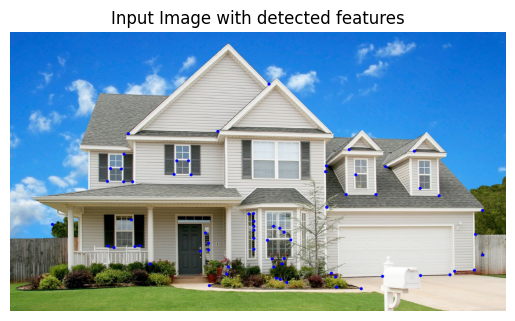

In [10]:
# Draw the image with the detected corners
for nms_cord in nms_cords:
    cv2.circle(img, (nms_cord[1], nms_cord[0]), 4, (255, 0, 0), -1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Input Image with detected features')
plt.axis('off')

Apply it on the house image

## Exercise 3
Several functions are available in OpenCV for calculating points of interest. :
+ [cornerHarris](http://docs.opencv.org/3.2.0/dc/d0d/tutorial_py_features_harris.html)
+ [cornerSubPix](http://docs.opencv.org/3.2.0/dc/d0d/tutorial_py_features_harris.html)
+ [goodFeaturesToTrack](http://docs.opencv.org/3.2.0/d4/d8c/tutorial_py_shi_tomasi.html) which corresponds to Shi Tomasi's approach
+ [SIFT](http://docs.opencv.org/3.2.0/da/df5/tutorial_py_sift_intro.html)

## Exercise 4: Creating a Panorama

The goal of this exercise is to create a panorama from several images, using the main concepts covered in class.

The principle is quite simple and follows the approach seen in class:

+ The first step is to decide which image will be your source image and which will be your destination images (i.e., the images you want to match with your source image).

+ Once the source image is chosen, a technique for creating a panorama is to place this image onto a larger canvas (a larger image where unknown pixels will be set to black). The [**warpAffine**](https://docs.opencv.org/3.4.0/da/d6e/tutorial_py_geometric_transformations.html) function in OpenCV could be used for this.

+ The next step involves detecting and describing a set of key points for the transformed target image and the set of destination images. You can use the [SIFT](https://docs.opencv.org/3.3.0/da/df5/tutorial_py_sift_intro.html) descriptors for this.

+ Then, you need to match the descriptors from the source image with those from the destination image. You can use several [matching](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_matcher/py_matcher.html) tools provided by the OpenCV library.

+ Only the top 200 matches will be kept for further processing.

+ From these matches, you need to calculate the homography that transforms the source image into the destination image. Only 4 matches are necessary to calculate this homography, but it is common to use more with the RANSAC approach explained very simply [here](http://eric-yuan.me/ransac/) and available in OpenCV (documentation [here](https://docs.opencv.org/3.4.0/d9/dab/tutorial_homography.html)) as a parameter in the **findHomography** function.

+ Apply the obtained homography to the destination image.

+ Merge the target image and the destination image.

<center><img src='./Figs/panorama.png'></center>


### Import useful files

In [1]:
%matplotlib inline
import numpy as np
import cv2 
from matplotlib import pyplot as plt

### First step: upload your images and select source and destination images.

You can place your various images in the [`Data`](.\Data) directory.

In [11]:
%matplotlib inline
import numpy as np
import cv2 
from matplotlib import pyplot as plt

In [13]:
img = cv2.imread('./Data/mail_1.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print(img.shape)

(3000, 4000, 3)


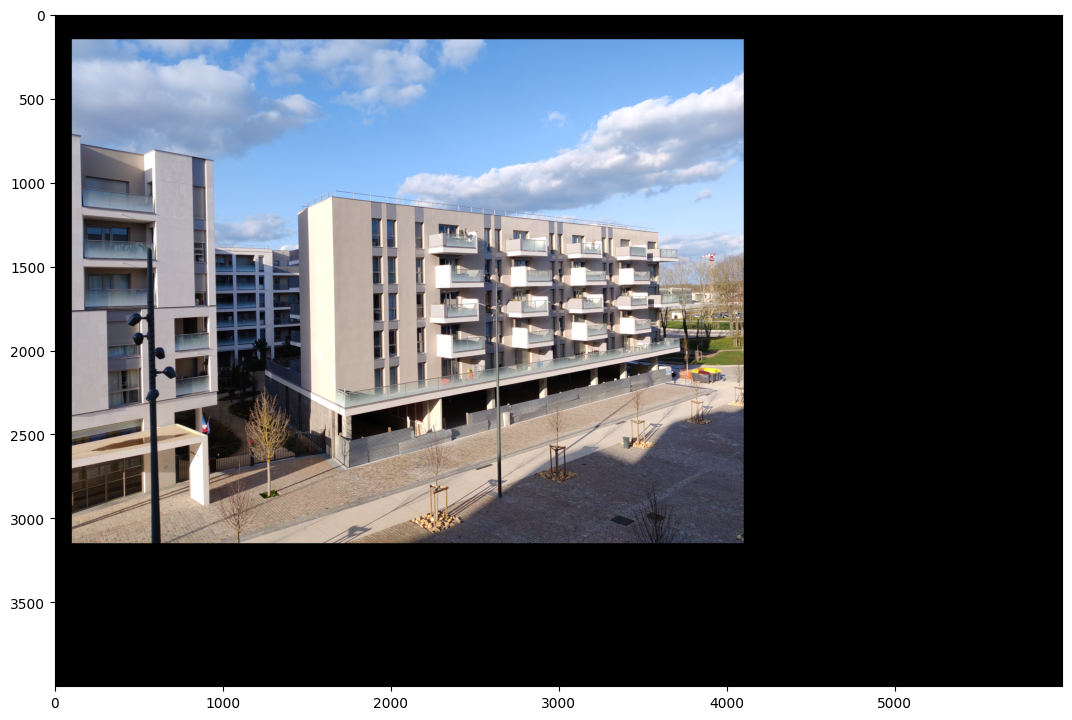

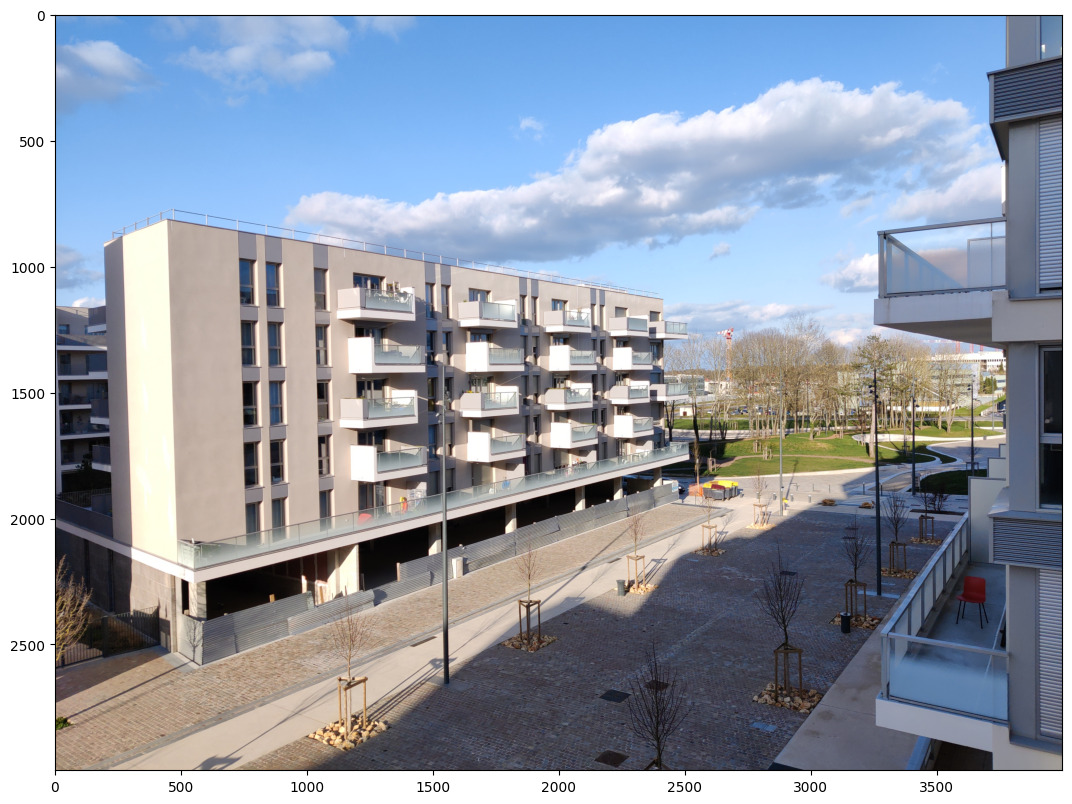

In [14]:
M = np.float32([[1,0,100],[0,1,150]])
sourcedst = cv2.warpAffine(rgb,M,(2*img.shape[0],1*img.shape[1]))

plt.figure(figsize=(13,10))
plt.imshow(sourcedst)
plt.show()

imgdest = cv2.imread('./Data/mail_2.jpg')
rgbdest = cv2.cvtColor(imgdest, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(13,10))
plt.imshow(rgbdest)
plt.show()

### Second step: calculating points of interest and their descriptions

For this step, you can try out several of the existing approaches available in the OpenCV library, such as :
+ SIFT (scale-invariant feature transform): see [here](https://docs.opencv.org/master/da/df5/tutorial_py_sift_intro.html)
+ SURF (Speeded-Up Robust Features): very similar to SIFT, but with an implementation that enables rapid calculation of points and descriptors (see [here](https://docs.opencv.org/master/df/dd2/tutorial_py_surf_intro.html)).
+ ORBFASTBRIEF (Oriented FAST and Rotated BRIEF) is a fast binary descriptor based on the combination of the FAST (Features from Accelerated Segment Test) key point detector and the BRIEF (Binary robust independent elementary features) descriptor. It is rotationally invariant and robust to noise. It was developed in the OpenCV labs and is an efficient and free alternative to SIFT. (see [here](https://docs.opencv.org/4.5.1/d1/d89/tutorial_py_orb.html))

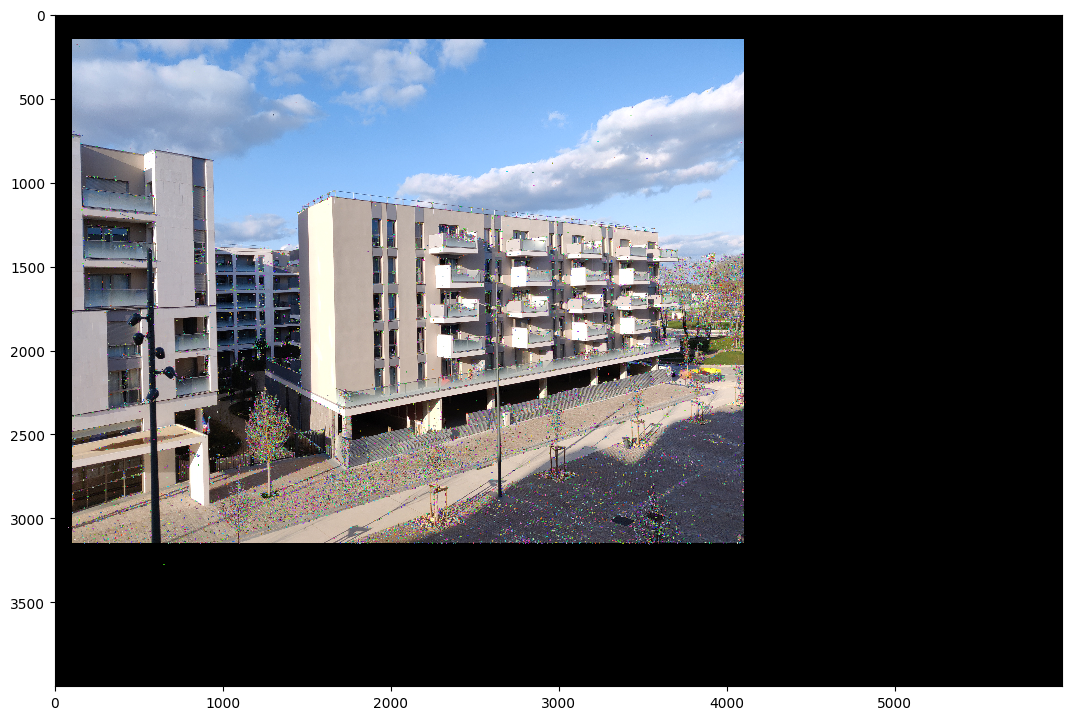

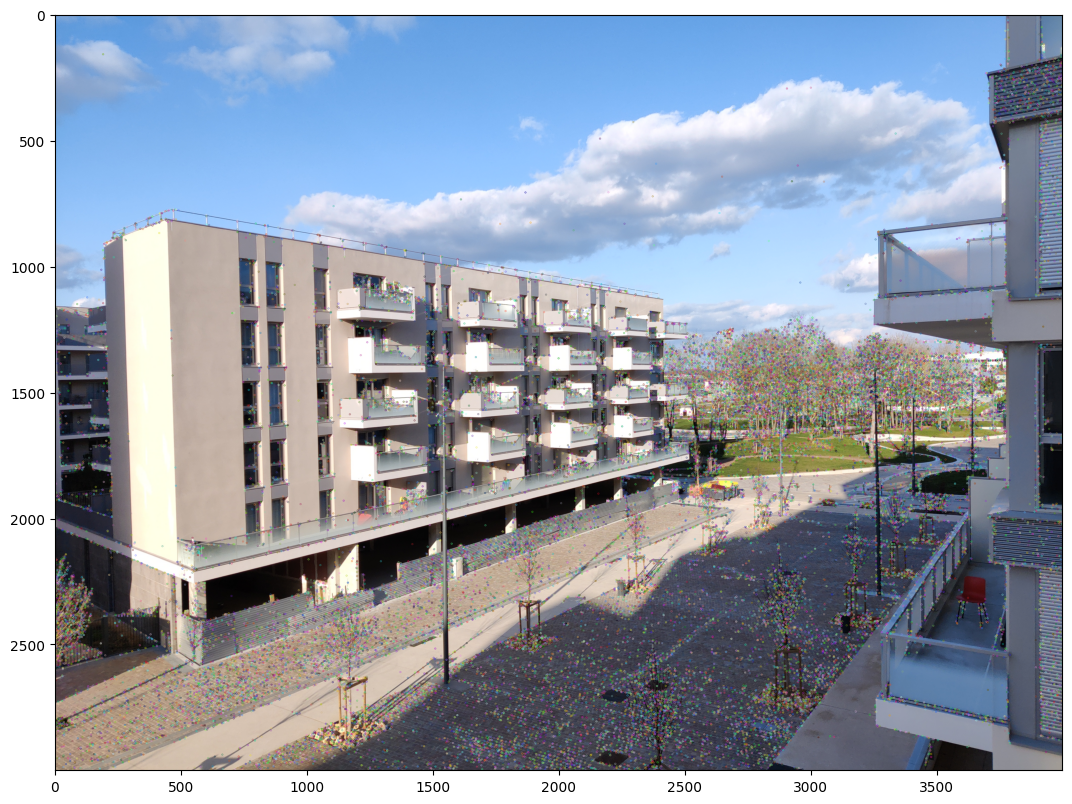

In [16]:
sift1 = cv2.SIFT_create()
kp, des = sift1.detectAndCompute(sourcedst,None)

sourcedst=cv2.drawKeypoints(sourcedst,kp,sourcedst)
cv2.imwrite('sift_keypoints_pano1.jpg',sourcedst)

plt.figure(figsize=(13,10))
plt.imshow(sourcedst,interpolation='nearest')
plt.show()

sift2 = cv2.SIFT_create()
kp2, des2 = sift2.detectAndCompute(rgbdest,None)

rgbdest=cv2.drawKeypoints(rgbdest,kp2,rgbdest)
plt.figure(figsize=(13,10))
plt.imshow(rgbdest)
plt.show()

### Step 3: Finding matching pairs

The next step is to find candidate matching pairs between two images. Here too, several approaches are possible, such as [`BFMatcher.knnMatch`](https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html). This approach measures the distance between each pair of keypoint descriptors and returns for each keypoint its k best matches with the minimum distance.

It is then necessary to apply a ratio filter to keep only the correct matches. Indeed, to obtain a reliable match, the matched key points must be significantly closer than the closest incorrect match.

In [ ]:
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des,des2,k=2)


# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(sourcedst,kp,rgbdest,kp2,matches,None,**draw_params)

plt.figure(figsize=(13,10))
plt.imshow(img3,)
plt.show()

### Step 4: Calculating homography 

Once we've matched at least four pairs of key points, we can transform one image relative to the other. This operation is called image warping. Two images of the same plane surface in space are linked by a homography. Homographies are geometric transformations that have 8 free parameters and are represented by a 3x3 matrix. They represent any distortion applied to an image as a whole (as opposed to local distortions). Consequently, to obtain the transformed detected image, we need to calculate the homography matrix and apply it to the detected image.

The RANSAC algorithm can be used to detect outliers and eliminate them before determining the final homography. It is directly integrated into OpenCV's [`findHomography`](https://docs.opencv.org/master/d1/de0/tutorial_py_feature_homography.html) method. 

In [ ]:
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

if len(good)>10:
    src_pts = np.float32([ kp[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC,5.0)
    warp_img = cv2.warpPerspective(rgbdest, M, (sourcedst.shape[1], sourcedst.shape[0]))
    plt.figure(figsize=(13,10))
    plt.imshow(sourcedst)
    plt.show()
    plt.figure(figsize=(13,10))
    plt.imshow(warp_img)
    plt.show()
    blacks = sourcedst==0
    result = np.copy(sourcedst)
    result[blacks] = warp_img[blacks]
    plt.figure(figsize=(13,10))
    plt.imshow(result)
    plt.show()


### Fifth step: image warping

Apply a warp transformation using the homography matrix obtained

Apply your chain to the various imahes collected. What do you recommend? What kind of improvements would you suggest?

To go deeper:
+ https://www.pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/